Team :
Mohamed Ashraf Khalaf Hafez     ID : 2205201 ; 
Khalid Walid Mohamed Ghalwash   ID : 2205018

In [31]:
# Libraries for both questions.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Libraries for KNN question.
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import RandomOverSampler # for oversamples(gamma and hadrons)
import seaborn as sns # used for some plotting
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
# Libraries for Regression question.
from sklearn.linear_model import LinearRegression,  Lasso, Ridge
from sklearn.model_selection import train_test_split #for splitting data
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

KNN Assignment

Read data

In [32]:
# idea i want to predict the patterns came from  gammas or hadrons to future samples (classification) , each sample has features
# create columns name as they are not in the original dataset
cols = ["fLength" , "fWidth" , "fSize" , "fConc" , "fConc1" , "fAsym" , "fM3Long" , "fM3Trans" , "fAlpha" , "fDist" , "class"]

# turn data csv to data frame object
df = pd.read_csv("magic04.data" , names=cols)
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [33]:
# g ==> gamma , h ==> hadrons , and convert g ==> 1 & h ==> 0
df["class"].unique()

df["class"] = (df["class"] == 'g').astype(int)

df.head()


,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


Split data : Train , validation , test datasets.

In [60]:
# use numpy to split data
# first place i will split dataframe at 70% then at 85% , every thing between 70% and 85% will go to ==> validate
train_validate, test = train_test_split(df, test_size=0.15, random_state=42)
train , valid = train_test_split(train_validate, test_size=0.1765, random_state=42)

print("Length of whole data" , len(df))
print ("Train data number " , len(train) )
print ("vVlidation data number " , len(valid) )
print ("Test data number " , len(test) )

Length of whole data 19020
Train data number  13313
vVlidation data number  2854
Test data number  2853


In [35]:
print(len(train[train["class"]==1])) # print number of gammas
print(len(train[train["class"]==0])) # hadrons
# data of gammas is much more ==> so i will use oversampling

8646
4667


In [36]:
# Oversammpling function
# oversample is false for default
def scale_dataset(dataframe, oversample=False):
  # the labels will gonna be the last thing in the dataframe.
  X = dataframe[dataframe.columns[:-1]].values # Features
  y = dataframe[dataframe.columns[-1]].values  # Output

  if oversample:
   ros = RandomOverSampler()
   X, y = ros.fit_resample(X, y)

  # horizentaly stack the data (not on top of each other) ==> the whole data as huge numpy array.
  # I'll use reshape as x is 2D but y is 1d(vector) , -1 == len(y).
  data = np.hstack((X , np.reshape(y , (-1 , 1))))
  
  return data ,X ,y

In [37]:
train, Xk_train, yk_train = scale_dataset(train, oversample=True)
valid, Xk_valid, yk_valid = scale_dataset(valid, oversample=False)
test, Xk_test, yk_test = scale_dataset(test, oversample=False)
# In validate and test data i dont care about oversampling.

In [38]:
# check
print(len(yk_train))
# train data are equal now
print(sum(yk_train == 1))
print(sum(yk_train == 0))

17292
8646
8646


Scalling

In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit the scaler on the training data and transform it
Xk_train_scaled = scaler.fit_transform(Xk_train)
# Scale test data
Xk_test_scaled = scaler.transform(Xk_test)

Applying KNN

In [40]:
#Using k = 3
knn_model1 = KNeighborsClassifier(n_neighbors=3) # n_neighbors ==> k (no of neighbors)
knn_model1.fit(Xk_train_scaled, yk_train)

yk_pred1 = knn_model1.predict(Xk_test_scaled)

# Report of k = 3
# The test data are labeld so we compare it with the predicted data of our model.
print(classification_report(yk_test, yk_pred1))

              precision    recall  f1-score   support

           0       0.74      0.73      0.73      1003
           1       0.85      0.86      0.86      1850

    accuracy                           0.81      2853
   macro avg       0.80      0.79      0.80      2853
weighted avg       0.81      0.81      0.81      2853



In [41]:
#Using k = 1
knn_model2 = KNeighborsClassifier(n_neighbors=1) # n_neighbors ==> k (no of neighbors)
knn_model2.fit(Xk_train_scaled, yk_train)
yk_pred2 = knn_model2.predict(Xk_test_scaled)
# Report of k = 3
# The test data are labeld so we compare it with the predicted data of our model.
print(classification_report(yk_test, yk_pred2))


              precision    recall  f1-score   support

           0       0.79      0.68      0.73      1003
           1       0.84      0.90      0.87      1850

    accuracy                           0.82      2853
   macro avg       0.81      0.79      0.80      2853
weighted avg       0.82      0.82      0.82      2853



In [42]:
#Using k = 5
knn_model3 = KNeighborsClassifier(n_neighbors=5) # n_neighbors ==> k (no of neighbors)
knn_model3.fit(Xk_train_scaled, yk_train)
yk_pred3 = knn_model3.predict(Xk_test_scaled)
# Report of k = 5
# The test data are labeld so we compare it with the predicted data of our model.
print(classification_report(yk_test, yk_pred3))

              precision    recall  f1-score   support

           0       0.76      0.73      0.75      1003
           1       0.86      0.88      0.87      1850

    accuracy                           0.83      2853
   macro avg       0.81      0.80      0.81      2853
weighted avg       0.82      0.83      0.82      2853



Or using confusion matrix

In [43]:
# Get the unique classes present in the predicted labels
unique_classes = np.unique(yk_pred1)

# Use one of the unique classes as the positive label
pos_label = unique_classes[0]  # Assuming the first unique class is the positive label

# Calculate precision using the specified positive label
precision = precision_score(yk_test, yk_pred1, pos_label=pos_label)


Test Accuracy: 0.8138801261829653
Precision: 0.7374245472837022
Recall: 0.7308075772681955
F1 Score: 0.7341011517275914
Confusion Matrix:
[[ 733  270]
 [ 261 1589]]


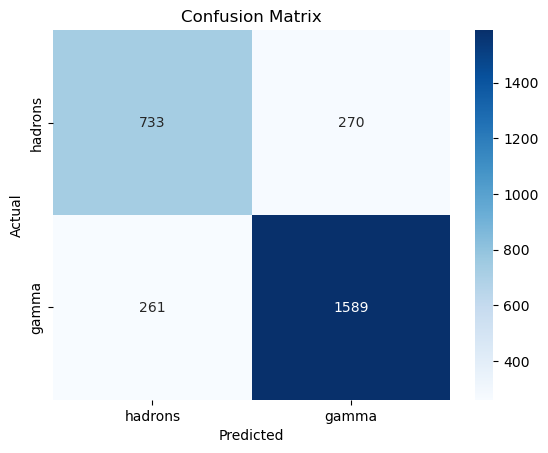

In [44]:
#For example 1 , k=3
# gamma ==> -ve , hadrons ==> +ve
yk_pred1 = knn_model1.predict(Xk_test_scaled)
accuracy = accuracy_score(yk_test, yk_pred1)
precision = precision_score(yk_test, yk_pred1, pos_label=0)
recall = recall_score(yk_test, yk_pred1, pos_label=0)
f1 = f1_score(yk_test, yk_pred1, pos_label=0)
conf_matrix = confusion_matrix(yk_test, yk_pred1)

print("Test Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(conf_matrix)

# Visualizing Confusion Matrix
labels = ['hadrons', 'gamma']
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Comparison

In [45]:
# Using K=3 and K=5 is better than using K=1 in on this data

Regression Assignment

Read data

In [46]:
data = pd.read_csv("California_Houses.csv")

In [47]:
data.head(10)

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
0,452600.0,8.3252,41,880,129,322,126,37.88,-122.23,9263.040773,556529.158342,735501.806984,67432.517001,21250.213767
1,358500.0,8.3014,21,7099,1106,2401,1138,37.86,-122.22,10225.733072,554279.850069,733236.884360,65049.908574,20880.600400
2,352100.0,7.2574,52,1467,190,496,177,37.85,-122.24,8259.085109,554610.717069,733525.682937,64867.289833,18811.487450
3,341300.0,5.6431,52,1274,235,558,219,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568
4,342200.0,3.8462,52,1627,280,565,259,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568
5,269700.0,4.0368,52,919,213,413,193,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568
6,299200.0,3.6591,52,2535,489,1094,514,37.84,-122.25,6843.020847,554364.406936,733249.808578,64315.991742,17538.209972
7,241400.0,3.1200,52,3104,687,1157,647,37.84,-122.25,6843.020847,554364.406936,733249.808578,64315.991742,17538.209972
8,226700.0,2.0804,42,2555,665,1206,595,37.84,-122.26,6363.948013,554949.749519,733820.824419,64751.463863,16744.406584
9,261100.0,3.6912,52,3549,707,1551,714,37.84,-122.25,6843.020847,554364.406936,733249.808578,64315.991742,17538.209972


Data Splitting

In [48]:
# Data splitting
features = ['Median_Income', 'Median_Age', 'Tot_Rooms', 'Tot_Bedrooms', 'Population', 'Households', 'Latitude', 'Longitude',
             'Distance_to_coast', 'Distance_to_LA', 'Distance_to_SanDiego', 'Distance_to_SanJose', 'Distance_to_SanFrancisco']
target = ["Median_House_Value"]

X = data[features] # input
y = data[target]   # output

X_train_validate, X_test, y_train_validate, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_validate, y_train_validate, test_size=0.1765, random_state=42)  # 15% of 85% = 12.75%

#check sizes
print("Size of input training set:" ,len(X_train) , "Size of output training set:", len(y_train)) # 70%
print("Size of input Validation set:" ,len(X_val) , "Size of output Validation set:", len(y_val) ) # 15%
print("Size of input testing set:" ,len(X_test) , "Size of output testing set:", len(y_test) ) # 15%


Size of input training set: 14447 Size of output training set: 14447
Size of input Validation set: 3097 Size of output Validation set: 3097
Size of input testing set: 3096 Size of output testing set: 3096


Scaling

In [49]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)
# Scale test data
X_test_scaled = scaler.transform(X_test)

Regression Models

In [50]:
# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train_scaled, y_train)
linear_reg_predictions = linear_reg.predict(X_test_scaled)

In [51]:
# Lasso Regression
lasso_reg = Lasso(alpha=0.1)  # Regularization parameter alpha = 0.1
lasso_reg.fit(X_train_scaled, y_train)
lasso_reg_predictions = lasso_reg.predict(X_test_scaled)

c:\Users\Cyber\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.178e+13, tolerance: 1.928e+10
  model = cd_fast.enet_coordinate_descent(


In [52]:
# Ridge Regression
ridge_reg = Ridge(alpha=1.0)  # Regularization parameter alpha = 1.0
ridge_reg.fit(X_train_scaled, y_train)
ridge_reg_predictions = ridge_reg.predict(X_test_scaled)

Plot the regression line

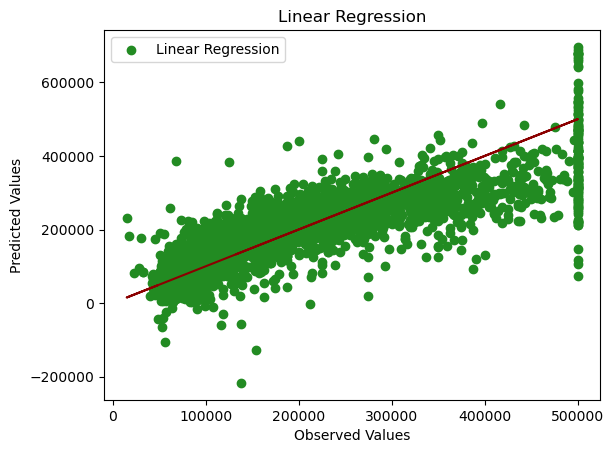

In [53]:
# Scatter plot for linear regression line
plt.scatter(y_test, linear_reg_predictions , color="forestgreen", label="Linear Regression")
plt.xlabel('Observed Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression')
plt.legend()
plt.plot(y_test, y_test, color='darkred')  # line for perfect prediction (true values)
plt.show()

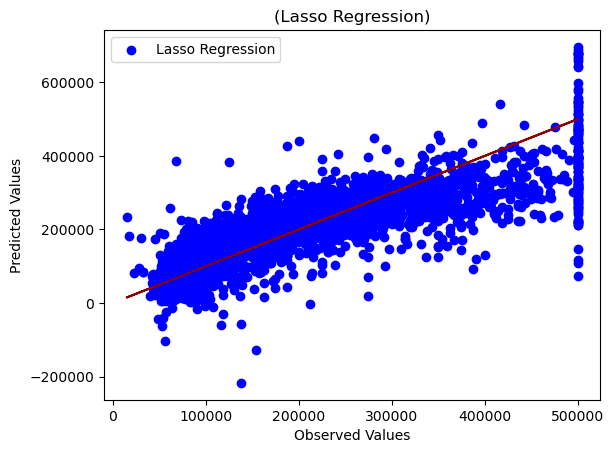

In [54]:
# Scatter plot for lasso regression line
plt.scatter(y_test, lasso_reg_predictions, color="blue", label="Lasso Regression")
plt.xlabel('Observed Values')
plt.ylabel('Predicted Values')
plt.title('(Lasso Regression)')
plt.legend()
plt.plot(y_test, y_test, color='darkred')  # line for perfect prediction (true values)
plt.show()

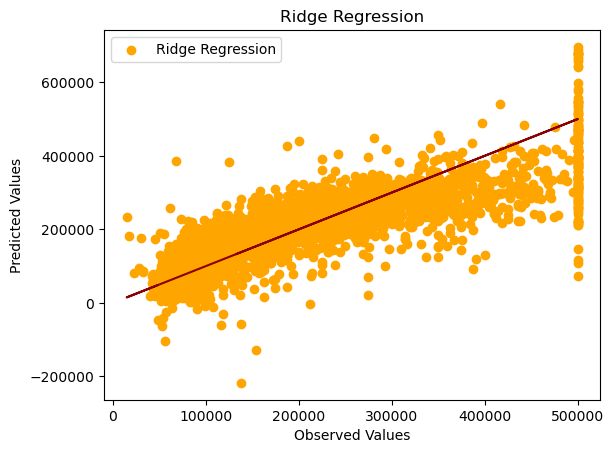

In [55]:
# Scatter plot for ridge regression line
plt.scatter(y_test, ridge_reg_predictions, color="orange", label="Ridge Regression")
plt.xlabel('Observed Values')
plt.ylabel('Predicted Values')
plt.title('Ridge Regression')
plt.legend()
plt.plot(y_test, y_test, color='darkred')  # line for perfect prediction (true values)
plt.show()

Report

In [56]:
#  Report (Mean Square Error and Mean Absolute Errors for linear regression) .
mse_lr = mean_squared_error(y_test , linear_reg_predictions)
mae_lr = mean_absolute_error(y_test , linear_reg_predictions)
score_lr = r2_score(y_test , linear_reg_predictions)

print('MSE : ' , mse_lr)
print('MAE : ' , mae_lr)
print('r2_score : ' , score_lr)


MSE :  4857042102.163028
MAE :  50744.91362774617
r2_score :  0.6293770994155378


In [57]:
#  Report (Mean Square Error and Mean Absolute Errors for lasso regression) .
mse_lassor = mean_squared_error(y_test , lasso_reg_predictions)
mae_lassor = mean_absolute_error(y_test , lasso_reg_predictions)
score_lassor = r2_score(y_test , lasso_reg_predictions)

print('MSE : ' , mse_lassor)
print('MAE : ' , mae_lassor)
print('r2_score : ' , score_lassor)


MSE :  4857205491.653456
MAE :  50746.15004430964
r2_score :  0.6293646317684403


In [58]:
#  Report (Mean Square Error and Mean Absolute Errors for Ridge regression) .
mse_ridge = mean_squared_error(y_test , ridge_reg_predictions)
mae_ridge = mean_absolute_error(y_test , ridge_reg_predictions)
score_ridge = r2_score(y_test , ridge_reg_predictions)

print('MSE : ' , mse_ridge)
print('MAE : ' , mae_ridge)
print('r2_score : ' , score_ridge)

MSE :  4857422686.813388
MAE :  50751.24899038836
r2_score :  0.6293480584099076
